In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/phishing.csv")

# Display first 5 rows
df.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
# Check dataset shape
print("Shape of dataset:", df.shape)

# Check column names
print("Columns:")
print(df.columns)


Shape of dataset: (11055, 32)
Columns:
Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')


In [3]:
# Remove 'index' column if it exists
if 'index' in df.columns:
    df = df.drop('index', axis=1)

# Convert target labels
df['Result'] = df['Result'].map({-1: 0, 1: 1})

# Verify changes
print(df.head())
print("\nUpdated target values:")
print(df['Result'].value_counts())


   having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                          -1              1                   1   
1                           1              1                   1   
2                           1              0                   1   
3                           1              0                   1   
4                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  Favicon  \
0                 -1              -1                           -1        1   
1                  0               1              

In [4]:
# Separate features and target
X = df.drop("Result", axis=1)
y = df["Result"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (11055, 30)
Target shape: (11055,)


In [5]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (8844, 30)
Testing feature shape: (2211, 30)
Training target shape: (8844,)
Testing target shape: (2211,)


In [6]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\91800\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
import sys
!{sys.executable} -m pip install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (8844, 30)
Testing feature shape: (2211, 30)
Training target shape: (8844,)
Testing target shape: (2211,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create model
log_model = LogisticRegression(max_iter=1000)

# Train model
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate
accuracy_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", accuracy_log)


Logistic Regression Accuracy: 0.924468566259611


In [11]:
import sys
!{sys.executable} -m pip install seaborn




[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


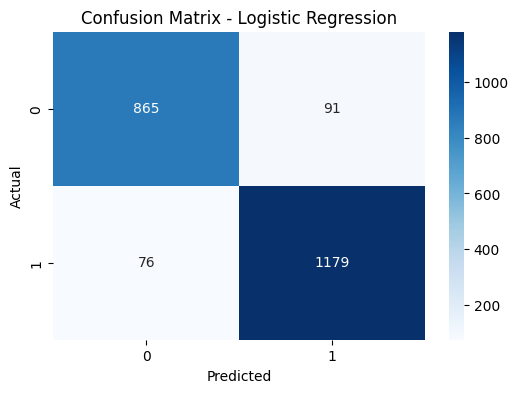

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_model = RandomForestClassifier()

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.966078697421981


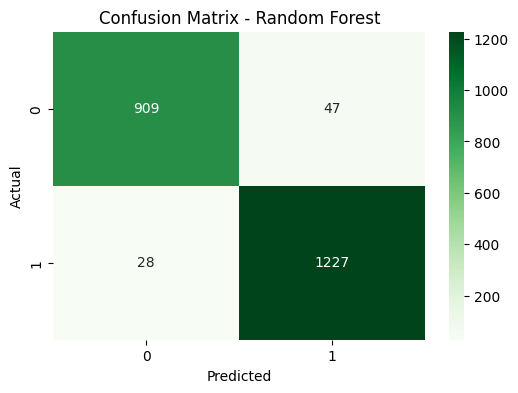

In [14]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [15]:
import pickle

# Save model
with open("../rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")


Model saved successfully!
